In [1]:
import shap
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from dash import html,dcc
import warnings
from explainerdashboard import ClassifierExplainer, ExplainerDashboard
import localmodules.conversor as c


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`

The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`


In [5]:
#Definição variáveis iniciais
file = './zDatabase/XAI - Limpo_dummified_minmax_smote.csv'
fileTrain = './zDatabase/XAI - Limpo_dummified_minmax_smote_train.csv'
fileTest = './zDatabase/XAI - Limpo_dummified_minmax_smote_test.csv'

name = 'XAI - Limpo_dummified_minmax_smote'
tc = 'surgycal margin'
data = pd.read_csv(file,index_col=tc,na_values='',sep=',', decimal='.')
df = pd.DataFrame(data)
rfb = joblib.load('./zDatabase/randomforests.joblib')

train: pd.DataFrame = pd.read_csv(fileTrain)
trnY: np.ndarray = train.pop(tc).values
trnX: np.ndarray = train.values
labels = pd.unique(trnY)
labels.sort()

test: pd.DataFrame = pd.read_csv(fileTest)
tstY: np.ndarray = test.pop(tc).values
tstX: np.ndarray = test.values

In [6]:
#Previsão
#[Age.at.MRI,Prostate.volume,PSA.value.at.MRI,Index.lesion.PIRADS.V2,Index.lesion.size,
# Capsular.contact.lenght_TLC,Smooth.capsular.bulging,Capsular.disruption,Unsharp.margin,
# Irregular.contour,Black.estrition.periprostatic.fat,Retoprostatic.angle.obliteration,
# Measurable.ECE,ECE.in.prostatectomy.specimen_gold.standard,Gleason.score,regra,surgycal margin] L=17
##-----------------------------------------------------------------------------------------------##
#[Age.at.MRI,Prostate.volume,PSA.value.at.MRI,Index.lesion.size,Capsular.contact.lenght_TLC,
# Smooth.capsular.bulging,Capsular.disruption,Unsharp.margin,Irregular.contour,Black.estrition.periprostatic.fat,
# Retoprostatic.angle.obliteration,Measurable.ECE,ECE.in.prostatectomy.specimen_gold.standard,Gleason.score
# regra,Index.lesion.PIRADS.V2_3,Index.lesion.PIRADS.V2_4,Index.lesion.PIRADS.V2_5,surgycal margin] L=19

#Conversão -> Transformação valor na posição [3] para 
col = ['Age.at.MRI','Prostate.volume','PSA.value.at.MRI','Index.lesion.size',
       'Capsular.contact.lenght_TLC','Smooth.capsular.bulging','Capsular.disruption','Unsharp.margin',
       'Irregular.contour','Black.estrition.periprostatic.fat','Retoprostatic.angle.obliteration',
       'Measurable.ECE','ECE.in.prostatectomy.specimen_gold.standard','Gleason.score','regra',
       'Index.lesion.PIRADS.V2_3','Index.lesion.PIRADS.V2_4','Index.lesion.PIRADS.V2_5','surgycal margin']
X = [0.444078947,0.2,0.352631579,0.37037037,0.05,0,0,0,0,0,0,0,0,0,1,0,0,1,0]
XX = c.dumm(X)
XXX = c.minmax(XX,data)
XXX.pop(-1)
Y = [XXX]

pred = rfb.predict(Y)
print("Input=%s, Predicted=%s" % (Y, pred))

Input=[[0.444078947, 0.2, 0.352631579, 0.05, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]], Predicted=[0]


In [7]:
shap.initjs()
# use Kernel SHAP to explain test set predictions
explainer = shap.TreeExplainer(rfb)
shap_values = np.array(explainer.shap_values(df))
print(shap_values.shape)

(2, 162, 18)


X has feature names, but RandomForestClassifier was fitted without feature names


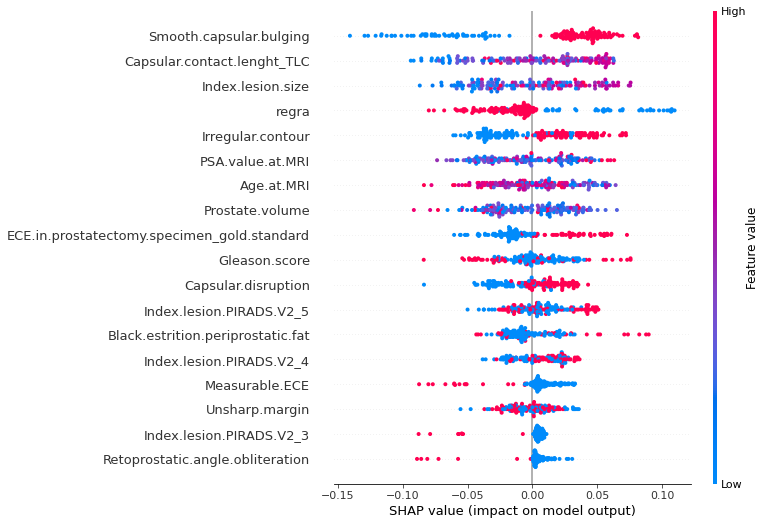

(2, 162, 18)


In [8]:
shap_values_ = shap_values.transpose((1,0,2))

np.allclose(
    rfb.predict_proba(df),
    shap_values_.sum(2) + explainer.expected_value
)

shap.summary_plot(shap_values[1],df)
print(shap_values.shape)

In [9]:
expected_value = explainer.expected_value

In [10]:
shap.force_plot(expected_value[1], shap_values[1][0,:], df.iloc[0,:])

In [10]:
shap.force_plot(explainer.expected_value[1], shap_values[1][:1000,:], df.iloc[:1000,:])

c:\Users\maria\AppData\Local\Programs\Python\Python39\lib\site-packages\shap\plots\_scatter.py:676: MatplotlibDeprecationWarning:

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.



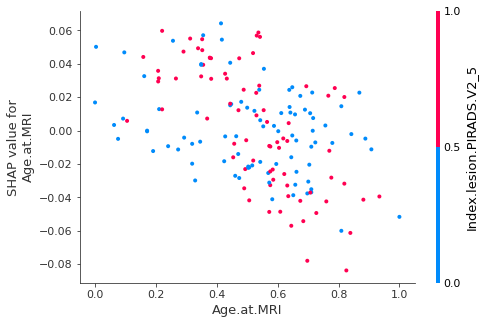

c:\Users\maria\AppData\Local\Programs\Python\Python39\lib\site-packages\shap\plots\_scatter.py:676: MatplotlibDeprecationWarning:

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.



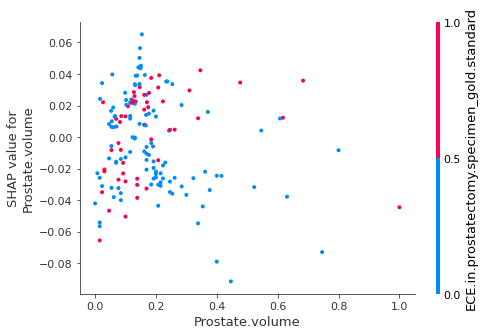

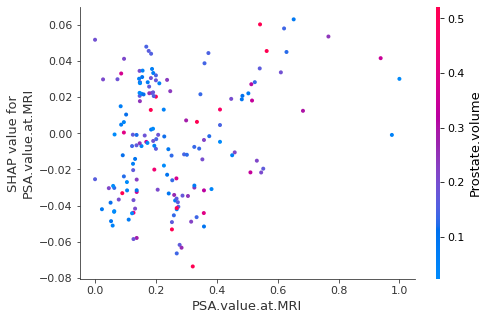

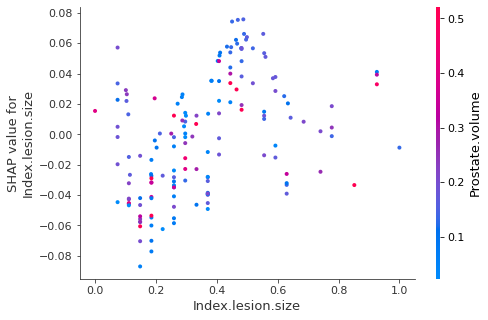

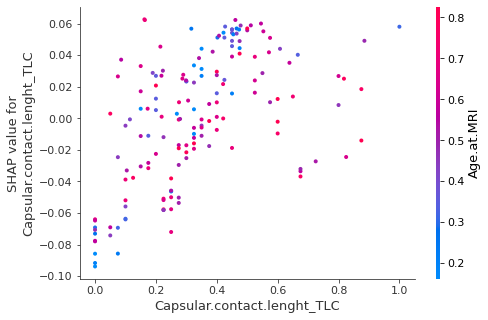

c:\Users\maria\AppData\Local\Programs\Python\Python39\lib\site-packages\shap\plots\_scatter.py:676: MatplotlibDeprecationWarning:

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.



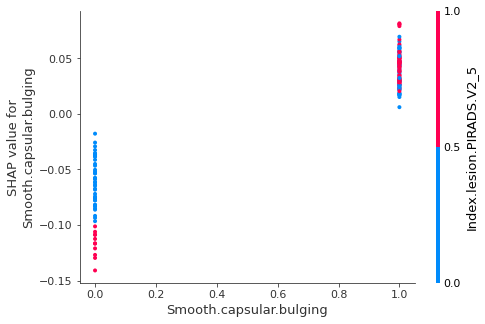

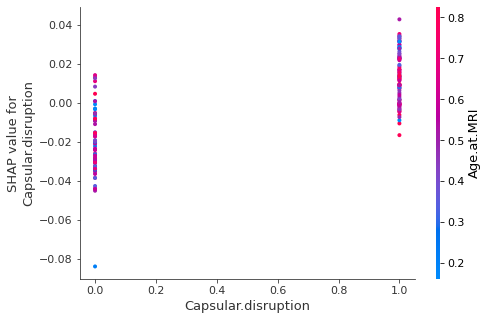

c:\Users\maria\AppData\Local\Programs\Python\Python39\lib\site-packages\shap\plots\_scatter.py:676: MatplotlibDeprecationWarning:

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.



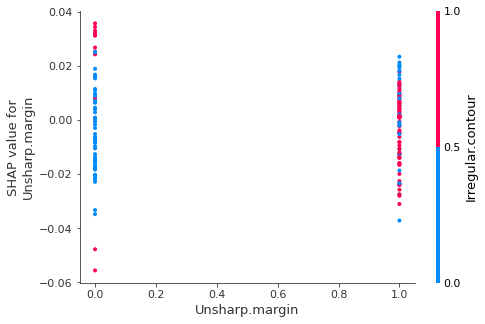

c:\Users\maria\AppData\Local\Programs\Python\Python39\lib\site-packages\shap\plots\_scatter.py:676: MatplotlibDeprecationWarning:

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.



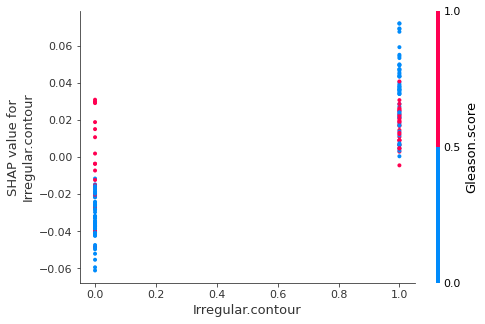

c:\Users\maria\AppData\Local\Programs\Python\Python39\lib\site-packages\shap\plots\_scatter.py:676: MatplotlibDeprecationWarning:

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.



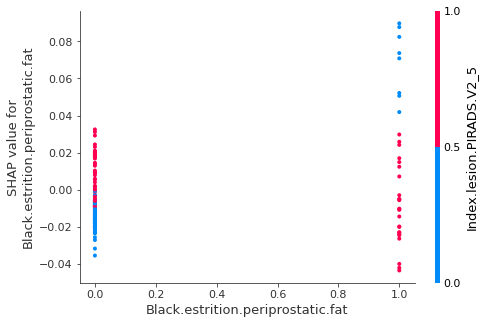

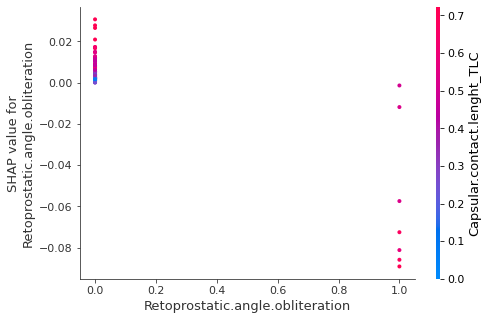

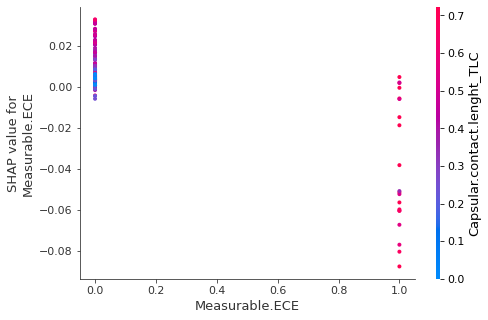

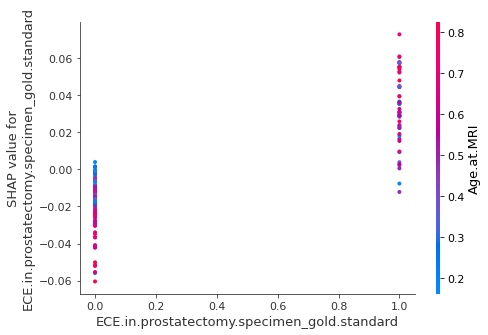

c:\Users\maria\AppData\Local\Programs\Python\Python39\lib\site-packages\shap\plots\_scatter.py:676: MatplotlibDeprecationWarning:

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.



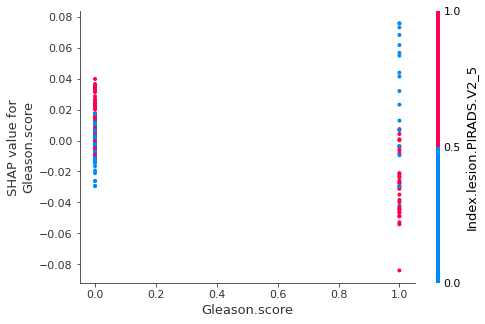

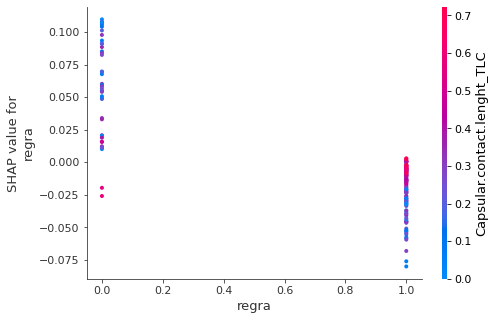

c:\Users\maria\AppData\Local\Programs\Python\Python39\lib\site-packages\shap\plots\_scatter.py:676: MatplotlibDeprecationWarning:

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.



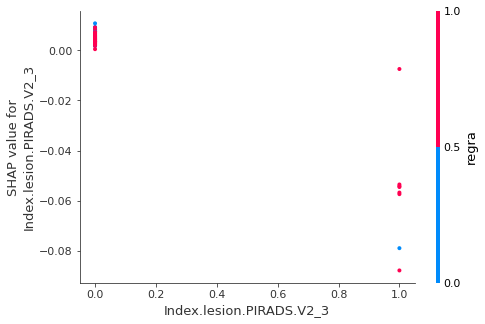

c:\Users\maria\AppData\Local\Programs\Python\Python39\lib\site-packages\shap\plots\_scatter.py:676: MatplotlibDeprecationWarning:

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.



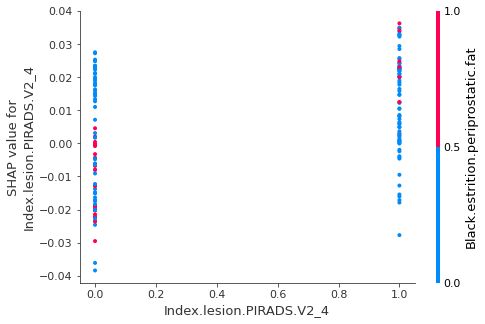

c:\Users\maria\AppData\Local\Programs\Python\Python39\lib\site-packages\shap\plots\_scatter.py:676: MatplotlibDeprecationWarning:

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.



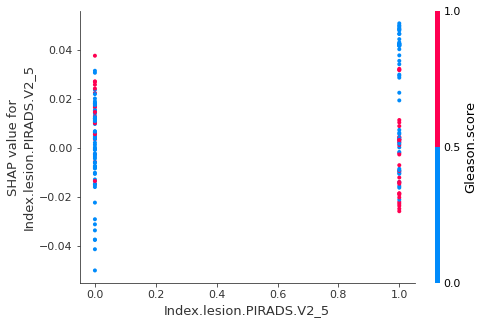

In [12]:
#Individual Dependence Plots
for name in df.columns:
    shap.dependence_plot(name, shap_values[1], df)

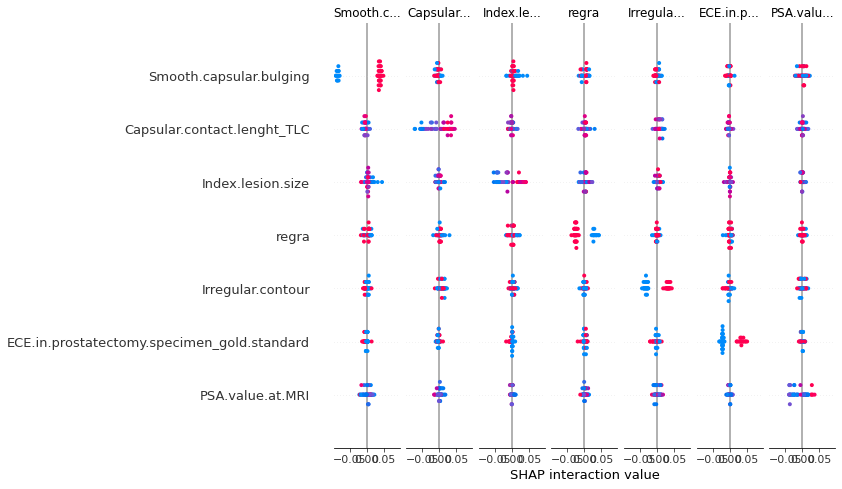

In [12]:
#Dependence Plots
X_interaction = tstX
shap_interaction_values = shap.TreeExplainer(rfb).shap_interaction_values(X_interaction)
len(shap_interaction_values)
shap.summary_plot(shap_interaction_values[1], X_interaction,df.columns)

Explainer expected value: [0.50075221 0.49924779]


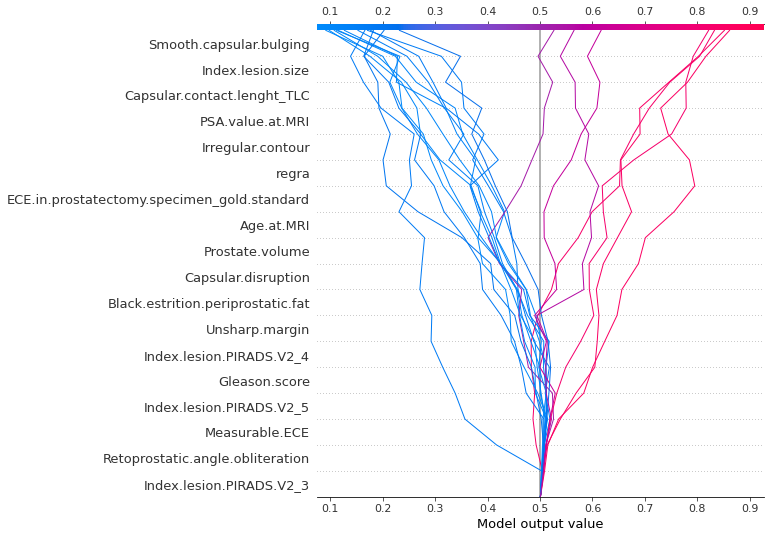

In [16]:
#Decision Plot
explainer = shap.TreeExplainer(rfb)
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer expected value: {expected_value}")

select = range(20)
features = df.iloc[select]
features_display = df.loc[df.index]

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    shap_values = explainer.shap_values(features)[1]
    shap_interaction_values = explainer.shap_interaction_values(features)
if isinstance(shap_interaction_values, list):
    shap_interaction_values = shap_interaction_values[1]
    
shap.decision_plot(expected_value[0], shap_values, features)

In [24]:
col2 = ['Age.at.MRI','Prostate.volume','PSA.value.at.MRI','Index.lesion.size',
       'Capsular.contact.lenght_TLC','Smooth.capsular.bulging','Capsular.disruption','Unsharp.margin',
       'Irregular.contour','Black.estrition.periprostatic.fat','Retoprostatic.angle.obliteration',
       'Measurable.ECE','ECE.in.prostatectomy.specimen_gold.standard','Gleason.score','regra',
       'Index.lesion.PIRADS.V2_3','Index.lesion.PIRADS.V2_4','Index.lesion.PIRADS.V2_5']

x_patient = pd.DataFrame(data=[XXX],
                             columns=col2,
                             index=[0])
#explainer.shap_values(x_patient)[0].flatten()
#explainer.expected_value
data_patient = x_patient.to_json()
x_new = pd.read_json(data_patient)
x_new.values

array([[0.44407895, 0.2       , 0.35263158, 0.05      , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        ]])

In [6]:
#Dashboard Vizualizer
feature_descriptions = {
    "Age.at.MRI": "Age at MRI",
    "Prostate.volume": "Size of prostate",
    "PSA.value.at.MRI": "PSA value at MRI",
    "Index.lesion.size": "Size of the lesion",
    "Capsular.contact.lenght_TLC": "Length of capsular contact",
    "Smooth.capsular.bulging": "Smooth capsular bulging", 
    "Capsular.disruption": "Capsular disruption",
    "Unsharp.margin": "Unsharp margin",
    "Irregular.contour": "Irregular contour",
    "Black.estrition.periprostatic.fat" : "Black estrition periprostatic fat",
    "Retoprostatic.angle.obliteration":"Retoprostatic angle obliteration",
    "Measurable.ECE":"Measurable ECE",
    "ECE.in.prostatectomy.specimen_gold.standard":"ECE in prostatectomy specimen gold-standard",
    "Gleason.score":"Gleason score",
    "regra":"Rule followed by the surgeon",
    "Index.lesion.PIRADS.V2":"Index lesion PIRADSV2 - 3, 4 or 5",
}

explainer = ClassifierExplainer(rfb, test, tstY, 
  cats=[{'Index.lesion.PIRADS.V2': ['Index.lesion.PIRADS.V2_3', 'Index.lesion.PIRADS.V2_4', 'Index.lesion.PIRADS.V2_5']}],
  descriptions=feature_descriptions, # defaults to None
  labels=['Positive surgical margin', 'Negative surgical margin'], # defaults to ['0', '1', etc]
  #idxs = test_names, # defaults to X.index
  index_name = "Pacient", # defaults to X.index.name
  target = tc, # defaults to y.name
  )

db = ExplainerDashboard(explainer, 
  title="Prostatic Cancer Explainer", # defaults to "Model Explainer"
  whatif=False, # you can switch off tabs with bools
                        )
db.run(port=8050)

Detected RandomForestClassifier model: Changing class type to RandomForestClassifierExplainer...
Note: model_output=='probability', so assuming that raw shap output of RandomForestClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
Generating layout...
Calculating shap values...
Calculating prediction probabilities...
Calculating metrics...


c:\Users\maria\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:434: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...


c:\Users\maria\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:434: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

c:\Users\maria\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:434: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

c:\Users\maria\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:434: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

c:\Users\maria\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:434: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

c:\Users\maria\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:434: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

c:\Users\maria\AppData\Local\Programs\Python\Python39\l

Calculating shap interaction values... (this may take a while)
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...


c:\Users\maria\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:434: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

c:\Users\maria\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:434: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

c:\Users\maria\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:434: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

c:\Users\maria\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:434: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

c:\Users\maria\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:434: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

c:\Users\maria\AppData\Local\Programs\Python\Python39\l

Calculating predictions...
Calculating pred_percentiles...
Calculating ShadowDecTree for each individual decision tree...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://192.168.1.70:8050
Dash is running on http://0.0.0.0:8050/

 * Serving Flask app 'explainerdashboard.dashboards' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


c:\Users\maria\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:434: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

c:\Users\maria\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:434: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

 * Running on all addresses.
 * Running on http://192.168.1.70:8050/ (Press CTRL+C to quit)
192.168.1.70 - - [26/May/2022 20:47:30] "GET / HTTP/1.1" 200 -
192.168.1.70 - - [26/May/2022 20:47:30] "GET /_dash-component-suites/dash/deps/polyfill@7.v2_4_1m1653591900.12.1.min.js HTTP/1.1" 200 -
192.168.1.70 - - [26/May/2022 20:47:30] "GET /assets/bootstrap.min.css?m=1653591903.868965 HTTP/1.1" 200 -
192.168.1.70 - - [26/May/2022 20:47:30] "GET /_dash-component-suites/dash_bootstrap_components/_components/dash_bootstrap_components.v0_13_1m1653591902.min.js HTTP/1.1" 200 -
192.168.1.70 - - [26/May/2022 20:47:30] "GET /_da


                so no dtreeviz visualisation of decision trees will be shown on the shadow trees tab.

                See https://github.com/parrt/dtreeviz for info on how to properly install graphviz 
                for dtreeviz. 
                
No graphviz 'dot' executable available!


192.168.1.70 - - [26/May/2022 22:35:28] "POST /_dash-update-component HTTP/1.1" 200 -


No graphviz 'dot' executable available!
